### CAPSTONE UAS BENGKOD
Nama : Devi Prasetyoningrum

NIM : A11.2021.13378

1. PENGUMPULAN DATA

In [1]:
# File path
dir = 'hungarian.data'

# Membaca file dan memproses data
with open(dir, encoding='latin1') as file:
    lines = [line.strip() for line in file]

lines[0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

2. MENELAAH DATA

 code di atas akan menghasilkan tabel berisi 76 kolom fitur yang nantinya akan diseleksi
 kembali manakah fitur yang akan digunakan

In [2]:
import itertools
import pandas as pd
import numpy as np
import re

# Create a DataFrame 
data = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(lines[i:(i + 10)]).split() for i in range(0, len(lines), 10))
)

df = pd.DataFrame.from_records(data)

df.head()

d:\Anaconda\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


3. VALIDASI DATA

Didalam dataset ini nilai-9.0 merupakan nilai NULL oleh karena itu ubahlah agar dataset ini sesuai dengan kondisi tersebut.

In [3]:
# Diperlukan penghapusan fitur terlebih dahulu
df = df.iloc[:, :-1]
df = df.drop(df.columns[0], axis=1)

# Mengubah tipe data menjadi float agar sesuai dengan nilai null yaitu -9.0
df = df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

In [4]:
# Ubah Nilai -9.0 menjadi Nilai Null
df.replace(-9.0, np.nan, inplace=True)
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,1.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,0.0,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,0.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


4. MENENTUKAN OBJEK DATA

 Dalam dataset Hungarian fitur yang hanya digunakan hanya 14 fitur

In [5]:
selected_columns = [2, 3, 8, 9, 11, 15, 18, 31, 37, 39, 40, 43, 50, 57]
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

df_selected = df[selected_columns]
df_selected.columns = column_names
df_selected.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


In [6]:
# Hitung jumlah kemunculan nilai dalam setiap kolom
df_selected.value_counts()

age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope  ca   thal  target
47.0  1.0  4.0  150.0     226.0  0.0  0.0      98.0     1.0    1.5      2.0    0.0  7.0   1.0       1
Name: count, dtype: int64

5. MEMBERSIHKAN DATA

Sebelum melakukan pemodelan dilakukan pembersihan data agar model yang dihasilkan lebih akurat.

In [7]:
# Menghitung jumlah nilai null
df_selected.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

In [8]:
# Ada 3 fitur yang memiliki nilai null dominan, "Slope, Ca, Thal"
# Hapus 3 fitur tersebut menggunakan fungsi drop
columns_to_drop = ['slope', 'ca', 'thal']
df_selected = df_selected.drop(columns_to_drop, axis=1)

df_selected.isnull().sum()

age          0
sex          0
cp           0
trestbps     1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
oldpeak      0
target       0
dtype: int64

In [9]:
# Karena masih ada kolom yang bernilai null bisa diisi dengan nilai mean disetiap kolomnya
# Hitung rata-rata kolom trestbps, chol, fbs, restecg, thalach, exang
meanTBPS = round(df_selected['trestbps'].dropna().astype(float).mean())
meanCHOL = round(df_selected['chol'].dropna().astype(float).mean())
meanFBS = round(df_selected['fbs'].dropna().astype(float).mean())
meanRESTECG = round(df_selected['restecg'].dropna().astype(float).mean())
meanTHALACH = round(df_selected['thalach'].dropna().astype(float).mean())
meanEXANG = round(df_selected['exang'].dropna().astype(float).mean())

In [10]:
fill_values = {'trestbps': meanTBPS, 'chol': meanCHOL, 'fbs': meanFBS,
               'thalach': meanTHALACH, 'exang': meanEXANG, 'restecg': meanRESTECG
               }

df_clean = df_selected.fillna(value=fill_values)

In [11]:
df_clean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

In [12]:
# Cek duplikasi data
duplicate_rows = df_clean.duplicated()
df_clean[duplicate_rows]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [13]:
# Menghapus data duplikat
df_clean = df_clean.drop_duplicates()

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       293 non-null    float64
 1   sex       293 non-null    float64
 2   cp        293 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      293 non-null    float64
 5   fbs       293 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   293 non-null    float64
 10  target    293 non-null    float64
dtypes: float64(11)
memory usage: 27.5 KB


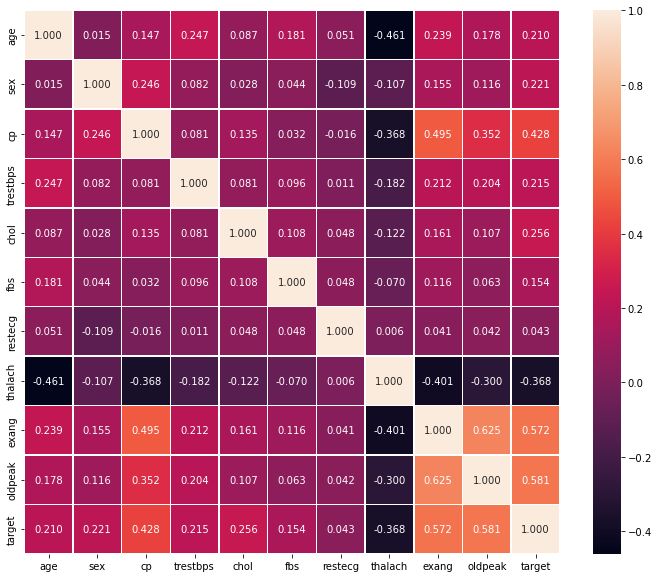

In [14]:
# MENGANALISA KORELASI ANTAR FITUR
import seaborn as sns
import matplotlib.pyplot as plt

corr_mat = df_clean.corr()
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr_mat, annot=True, linewidths= 0.5, fmt=".3f")

6. KONSTRUKSI DATA

pada tahap ini dataset sudah memiliki tipe data yang sesuai sehingga tidak perlu dilakukan penyesuaian kembali.

In [15]:
# Cek jumlah data target sesuai valuenya
df_clean['target'].value_counts()

target
0.0    187
1.0     37
3.0     28
2.0     26
4.0     15
Name: count, dtype: int64

In [16]:
# Pisahkan fitur target dengan fitur lainnya
X = df_clean.drop("target", axis=1).values
y = df_clean.iloc[:,-1]

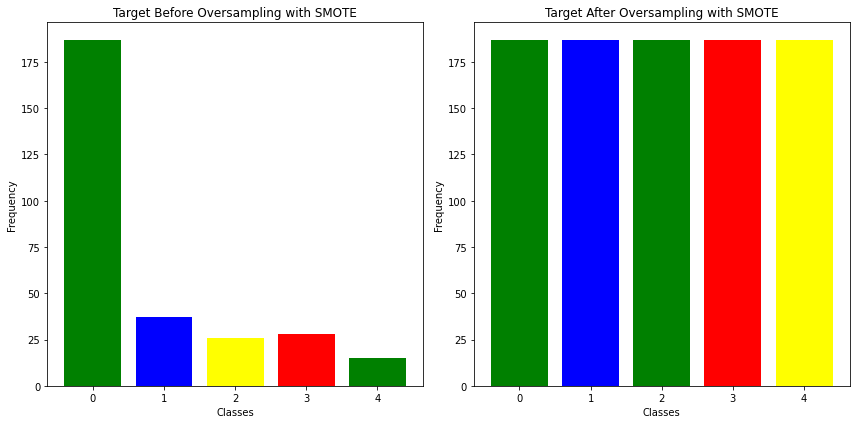

In [23]:
from imblearn.over_sampling import SMOTE
import pandas as pd
import matplotlib.pyplot as plt

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Membuat plot perbandingan sebelum dan sesudah SMOTE
plt.figure(figsize=(12, 6))

# Plot sebelum SMOTE
new_df1 = pd.DataFrame(data=y, columns=["target"])
count_before = new_df1['target'].value_counts()

plt.subplot(1, 2, 1)
plt.bar(count_before.index, count_before.values, color=['green', 'blue', 'red', 'yellow'])
plt.title('Target Before Oversampling with SMOTE')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

# Plot setelah SMOTE
new_df2 = pd.DataFrame(data=y_resampled, columns=["target"])
count_after = new_df2['target'].value_counts()

plt.subplot(1, 2, 2)
plt.bar(count_after.index, count_after.values, color=['green', 'blue', 'red', 'yellow'])
plt.title('Target After Oversampling with SMOTE')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

Normalisasi Dataset

In [24]:
# Cek apakah perlu normalisasi?
df_clean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,47.822526,0.726962,2.986348,132.662116,250.860068,0.068259,0.218430,139.058020,0.303754,0.588055,0.795222
std,7.824875,0.446282,0.965049,17.576793,65.059069,0.252622,0.460868,23.558003,0.460665,0.909554,1.238251
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,248.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,4.000000


In [25]:
# Normalisasi data fitur menggunakan Min-Max Scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_resampled_normal = scaler.fit_transform(X_resampled)

# Hitung jumlah sampel dalam dataset setelah di normalisasi
len(X_resampled_normal)

935

In [26]:
# Membuat dataframe dari dataset fitur yang sudah dinormalisasi
dfcek1 = pd.DataFrame(X_resampled_normal)
dfcek1.describe()

,0,1,2,3,4,5,6,7,8,9
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,0.563739,0.842507,0.818224,0.403413,0.341027,0.094277,0.117938,0.453354,0.598398,0.227015
std,0.174873,0.332492,0.274211,0.147493,0.110990,0.252030,0.199527,0.197232,0.450288,0.201293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.473283,1.000000,0.666667,0.305556,0.267954,0.000000,0.000000,0.312720,0.000000,0.000000
50%,0.578947,1.000000,1.000000,0.387952,0.330240,0.000000,0.000000,0.440606,0.962447,0.200000
75%,0.683363,1.000000,1.000000,0.487481,0.393811,0.000000,0.201473,0.593629,1.000000,0.386166
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Membagi Fitur dan Target Menjadi Data Train dan Test

In [27]:
from sklearn.model_selection import train_test_split

# Untuk yang oversample saja
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Untuk oversampling + normalisai
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_resampled_normal, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


7. PEMODELAN

In [28]:
# Membuat Fungsi Metrics Evaluasi Model
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix, precision_score

def evaluation(Y_test, Y_pred):
    acc = accuracy_score(Y_test, Y_pred)
    rcl = recall_score(Y_test, Y_pred, average='weighted')
    f1 = f1_score(Y_test, Y_pred, average='weighted')
    ps = precision_score(Y_test, Y_pred, average='weighted')

    metric_dict = {
        'accuracy': round(acc, 3),
        'recall': round(rcl, 3),
        'F1 score': round(f1, 3),
        'Precision score': round(ps, 3)
    }

    return print(metric_dict)

Model KNN

In [63]:
# Membuat Model Menggunakan Algoritma KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [64]:
y_pred_knn = knn_model.predict(X_test)
# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model")
accuracy_knn_smote = round(accuracy_score(y_test, y_pred_knn), 3)
print("Accuracy:", accuracy_knn_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

evaluation(y_test, y_pred_knn)


K-Nearest Neighbors (KNN) Model
Accuracy: 0.754
Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.39      0.49        38
         1.0       0.73      0.81      0.77        37
         2.0       0.80      0.86      0.83        37
         3.0       0.77      0.87      0.81        38
         4.0       0.78      0.84      0.81        37

    accuracy                           0.75       187
   macro avg       0.75      0.76      0.74       187
weighted avg       0.74      0.75      0.74       187

{'accuracy': 0.754, 'recall': 0.754, 'F1 score': 0.741, 'Precision score': 0.745}


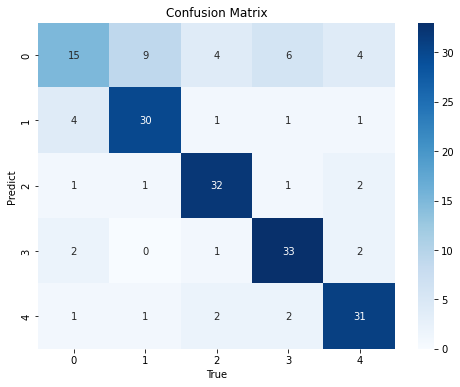

In [65]:
# Membuat confusion matrik model KNN
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


In [66]:
import pickle

with open('knn_model.pkl', 'wb') as f:
    pickle.dump(knn_model, f)

Model Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [68]:
y_pred_rf = rf_model.predict(X_test)
# Evaluate the Random Forest model
print("\nRandom Forest Model")
accuracy_rf_smote = round(accuracy_score(y_test, y_pred_rf), 3)
print("Accuracy:", accuracy_rf_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

evaluation(y_test, y_pred_rf)


Random Forest Model
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.922}


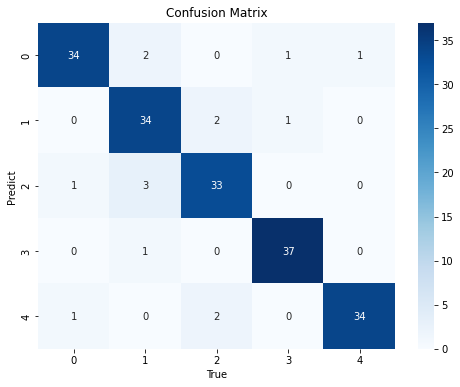

In [69]:
# Membuat Confusion Matrix Random Forest
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


In [70]:
import pickle

with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

Model XGBoost

In [71]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [72]:
y_pred_xgb = xgb_model.predict(X_test)
# Evaluate the XGBoost model
print("\nXGBoost Model")
accuracy_xgb_smote = round(accuracy_score(y_test, y_pred_xgb), 3)
print("Accuracy:", accuracy_xgb_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

evaluation(y_test, y_pred_xgb)


XGBoost Model
Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187

{'accuracy': 0.904, 'recall': 0.904, 'F1 score': 0.904, 'Precision score': 0.906}


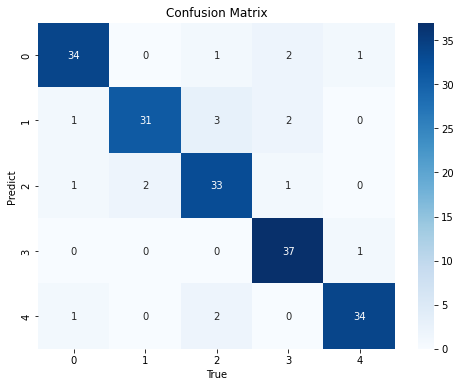

In [73]:
# Membuat confusion matriks XGBoost
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [74]:
import pickle

with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

Model Oversampling + Normalisasi

Model KNN

In [75]:
# Membuat Model Menggunakan Algoritma KNN
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_normal, y_train_normal)

KNeighborsClassifier(n_neighbors=3)

In [76]:
y_pred_knn_normal = knn_model.predict(X_test_normal)
# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal = round(accuracy_score(y_test_normal, y_pred_knn_normal), 3)
print("Accuracy:", accuracy_knn_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn_normal))

evaluation(y_test_normal, y_pred_knn_normal)


K-Nearest Neighbors (KNN) Model:
Accuracy: 0.861
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.76      0.82        38
         1.0       0.78      0.84      0.81        37
         2.0       0.87      0.92      0.89        37
         3.0       0.92      0.87      0.89        38
         4.0       0.87      0.92      0.89        37

    accuracy                           0.86       187
   macro avg       0.86      0.86      0.86       187
weighted avg       0.86      0.86      0.86       187

{'accuracy': 0.861, 'recall': 0.861, 'F1 score': 0.861, 'Precision score': 0.863}


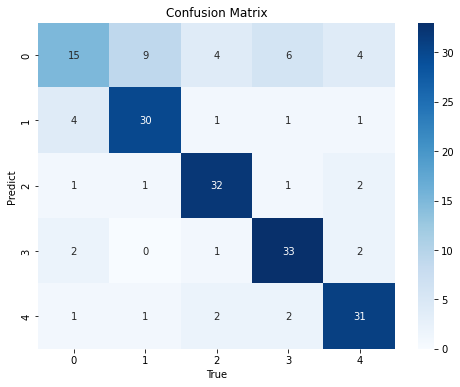

In [77]:
cm = confusion_matrix(y_test_normal, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [78]:
import pickle

with open('knn_model_normalisasi.pkl', 'wb') as f:
    pickle.dump(knn_model, f)

Model Random Forest

In [79]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_normal, y_train_normal)

RandomForestClassifier(random_state=42)

In [80]:
y_pred_rf = rf_model.predict(X_test_normal)
# Evaluasi Model Random Forest
print("\nRandom Forest Model:")
accuracy_rf_smote_normal = round(accuracy_score(y_test_normal, y_pred_rf), 3)
print("Accuracy:", accuracy_rf_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))

evaluation(y_test_normal, y_pred_rf)


Random Forest Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.922}


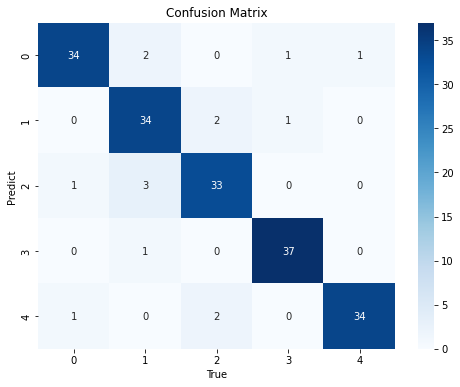

In [81]:
cm = confusion_matrix(y_test_normal, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [82]:
import pickle

with open('rf_model_normalisasi.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

Model XGBoost

In [83]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train_normal, y_train_normal)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [84]:
y_pred_xgb = xgb_model.predict(X_test_normal)
# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal = round(accuracy_score(y_test_normal, y_pred_xgb), 3)
print("Accuracy:", accuracy_xgb_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))

evaluation(y_test_normal, y_pred_xgb)



XGBoost Model:
Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187

{'accuracy': 0.904, 'recall': 0.904, 'F1 score': 0.904, 'Precision score': 0.906}


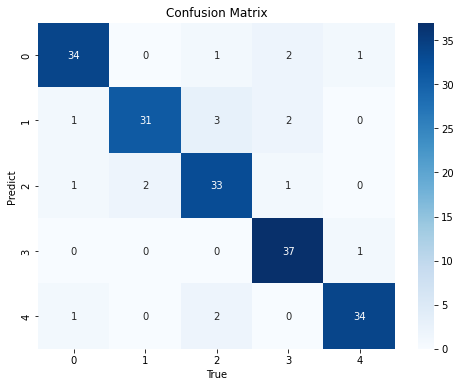

In [85]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [86]:
import pickle

with open('xgb_model_normalisasi.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

8. EVALUASI

Hasil Evaluasi Oversample saja

In [47]:
model_comp1 = pd.DataFrame({
    'Model': ['K-Nearest Neighbour', 'Random Forest', 'XGBoost'],
    'Accuracy': [accuracy_knn_smote * 100, accuracy_rf_smote * 100, accuracy_xgb_smote * 100]
})

model_comp1.head()

,Model,Accuracy
0,K-Nearest Neighbour,75.4
1,Random Forest,92.0
2,XGBoost,90.4


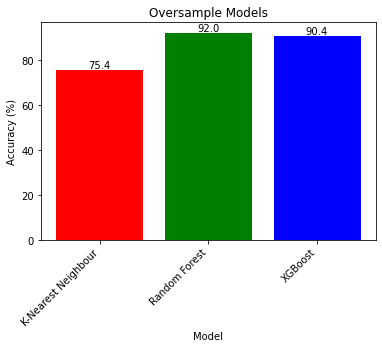

In [48]:
# Visualisasikan akurasi 3 model dari data oversample
fig, ax = plt.subplots()
bars = plt.bar(model_comp1['Model'], model_comp1['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample Models')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

Hasil Evaluasi Oversampling + Normalisasi

In [49]:
model_comp2 = pd.DataFrame({
    'Model': ['K-Nearest Neighbour', 'Random Forest', 'XGBoost'],
    'Accuracy': [accuracy_knn_smote_normal * 100, accuracy_rf_smote_normal * 100, accuracy_xgb_smote_normal * 100]
})

model_comp2.head()

,Model,Accuracy
0,K-Nearest Neighbour,86.1
1,Random Forest,92.0
2,XGBoost,90.4


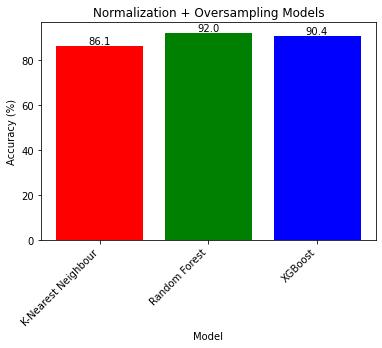

In [50]:
# Visualisasikan akurasi 3 model dari data oversample + normalisasi data
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp2['Model'], model_comp2['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling Models')
plt.xticks(rotation=45, ha='right')  # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()


10. Kesimpulan

Dari penelitian di atas setelah melakukan pemodelan dengan algoritma KNN, Random Forest, dan XGBoost dengan berbagai penanganan data antara lain menggunakan random over sampling SMOTE untuk penanganan imbalance data dan Normalisasi data menggunakan MinMaxScaler.Dapat disimpulkan bahwa klasifikasi menggunakan Random Oversampling SMOTE pada model KNN menghasilkan akurasi 75.4%, model Random Forest dengan hasil akurasi 92%, dan model XGBoost menghasilkan akurasi sebesar 90.4%. Kemudian untuk klasifikasi menggunakan data yang sudah dilakukan normalisasi dan SMOTE pada model KNN menghasilkan akurasi 86.1%, model Random Forest menghasilkan akurasi 92%, dan model XGBoost menghasilkan akurasi 90.4%.